# General Ideas : Gradient Descent 

#### Gradient Descent is an optimization algorithm used to minimize a cost (loss) function in machine learning and deep learning models. It's especially important in training models like linear regression, logistic regression, and neural networks.

#### Gradient -> derivative of two or more functions 
#### Taking Gradient that descend to lowest value of loss function 

### Steps to calculate Gradient descent:
#### 1. Calculate the derivative of LOSS FUNCTION with respect to the parameter 
#### 2. Put the random value of the parameter 
#### 3. Calculate the slope oof curve i.e tangent of that point for that random value of parameter
#### 4. Calculate step size = slope of curve * Learning Parameter
#### 5. Calculate new intercept = old intercept - step size
#### 6. repeat from step 3 to 6 for many times 
#### Gradient descent stop when step size / slope is very close to zero
#####
#### Learning Parameter -> Very sensitive to Gradient descent
#### Advantage of gradient descent is that it takes huge step for large values and baby step when the range of least value is close

##### lets create Gradient descent from strach


In [1]:
# Importing Library
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

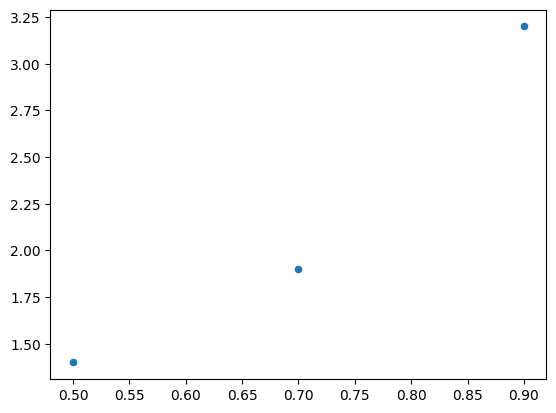

In [2]:
obs_x=[0.5,0.7,0.9]
obs_y=[1.4,1.9,3.2]
sns.scatterplot(x=obs_x,y=obs_y)

In [3]:
# loss function = Sum of Least Squared residual
# pred=(intercept+(x*slope))
# ssr=(obs-pred)^2=(obs-(intercept+(x*slope)))^2
# lets slope=0.64 , intercept=0
ssr=[]
intercept=[0,0.25,0.5,0.75,1,1.25,1.5,2,2.5,3,3.5,4]
for idx in range(len(intercept)):
    ssr_point=[]
    for i in range(len(obs_x)):
        slope=0.64
        c=intercept[idx]
        value=(obs_y[i]-(c+(obs_x[i]*slope)))**2
        ssr_point.append(value)
    value=sum(ssr_point)
    ssr.append(value)

In [4]:
print(ssr)

[10.16008, 7.76958, 5.75408, 4.113580000000001, 2.84808, 1.9575800000000003, 1.4420800000000005, 1.5360800000000001, 3.13008, 6.22408, 10.81808, 16.912080000000007]


<Axes: >

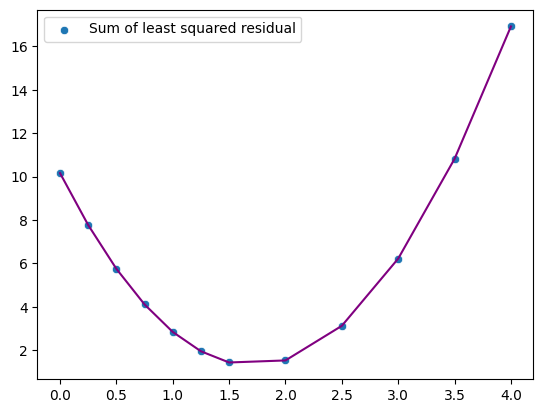

In [5]:
sns.scatterplot(x=intercept,y=ssr,label='Sum of least squared residual')
sns.lineplot(x=intercept,y=ssr,color='purple')

In [6]:
# Example observed data
obs_x = [1, 2, 3, 4, 5]
obs_y = [2.6, 4.3, 6.5, 8.0, 10.1]

# Initial setup
old_intercept = 0.0  # Starting guess
slope = 0.64         # Fixed slope for now
learning_rate = 0.01
intercept_list = []
sum_ssr = []
step_list = []

# Gradient Descent Loop
for i in range(1001):
    intercept = old_intercept
    derivative_ssr = []

    # Calculate derivative of SSR w.r.t intercept
    for j in range(len(obs_x)):
        error = obs_y[j] - (intercept + slope * obs_x[j])
        derivative = -2 * error
        derivative_ssr.append(derivative)

    # Mean of gradients (or sum if not normalizing)
    gradient = sum(derivative_ssr) / len(obs_x)  # Optionally divide by n
    step_size = learning_rate * gradient

    # Update intercept
    intercept = old_intercept - step_size

    # Track for plotting/analysis
    intercept_list.append(intercept)
    sum_ssr.append(sum(derivative_ssr))
    step_list.append(step_size)

    # Convergence check
    if abs(step_size) < 1e-6:
        print(f"Converged at iteration {i}")
        break

    # Prepare for next step
    old_intercept = intercept

# Final result
print(f"Final intercept: {intercept}")

Converged at iteration 564
Final intercept: 4.3799516711037425


In [7]:
print(intercept_list)
print(step_list)
print(sum_ssr)

[0.0876, 0.173448, 0.25757904, 0.3400274592, 0.420826910016, 0.50001037181568, 0.5776101643793664, 0.6536579610917791, 0.7281848018699435, 0.8012211058325447, 0.8727966837158938, 0.942940750041576, 1.0116819350407444, 1.0790482963399295, 1.145067330413131, 1.2097659838048682, 1.2731706641287708, 1.3353072508461954, 1.3962011058292716, 1.4558770837126862, 1.5143595420384326, 1.571672351197664, 1.6278389041737107, 1.6828821260902365, 1.7368244835684317, 1.7896879938970631, 1.8414942340191218, 1.8922643493387394, 1.9420190623519646, 1.9907786811049253, 2.038563107482827, 2.0853918453331706, 2.131284008426507, 2.176258328257977, 2.2203331616928175, 2.263526498458961, 2.305855968489782, 2.3473388491199865, 2.3879920721375867, 2.427832230694835, 2.466875586080938, 2.5051380743593192, 2.542635312872133, 2.5793826066146903, 2.6153949544823965, 2.6506870553927486, 2.6852733142848937, 2.719167847999196, 2.752384491039212, 2.7849368012184277, 2.816838065194059, 2.848101303890178, 2.87873927781237

now intercept had decided now lets us find and estimate slope and intercept

In [18]:
# Example observed data
obs_x = [1, 2, 3, 4, 5]
obs_y = [2.6, 4.3, 6.5, 8.0, 10.1]

# Initial setup
old_intercept = 0.0  # Starting guess
old_slope = 1         # intial slope for now
learning_rate = 0.01
parameter = {'intercept':[],'slope':[]}
sum_ssr = []
step_dict = {'intercept':[],'slope':[]}

# gradient descent loop 
for i in range(1001):
    derivative_slope=[]
    derivative_intercept=[]
    intercept=old_intercept
    slope=old_slope
    for j in range(len(obs_x)):
        error=(obs_y[j]-(intercept+slope*obs_x[j]))
        derivative_c=-2*error
        derivative_m=-2*obs_x[j]*error
        derivative_slope.append(derivative_m)
        derivative_intercept.append(derivative_c)

    # mean of gradient
    gradient_m=sum(derivative_slope)/len(obs_x)
    step_sizem=gradient_m*learning_rate
    gradient_c=sum(derivative_intercept)/len(obs_x)
    step_sizec=gradient_c*learning_rate

    # sum of least squared residual 
    ssr = sum((obs_y[j] - (intercept + slope * obs_x[j]))**2 for j in range(len(obs_x)))
    sum_ssr.append(ssr)

    #update intercept
    intercept=old_intercept-step_sizec
    #update slope
    slope=old_slope-step_sizem

    #inserting values 
    step_dict['intercept'].append(step_sizec)
    step_dict['slope'].append(step_sizem)

    parameter['intercept'].append(intercept)
    parameter['slope'].append(slope)

    #Bounding condition
    if abs(step_sizec)<1e-6 and abs(step_sizem)<1e-6:
        print(f"Converged at iteration {i}")
        break

    # prepare for next 
    old_intercept=intercept
    old_slope=slope

# final values 
print(f"Final intercept: {intercept}")
print(f"Final slope: {slope}")    

Final intercept: 0.6759435751557411
Final slope: 1.8738934042863626


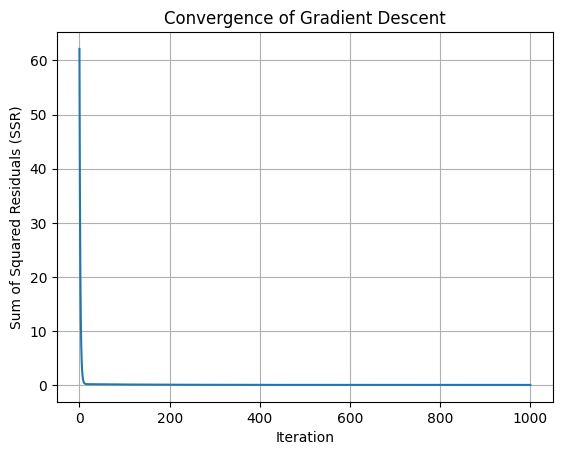

In [19]:
# final equation
#y=0.67594+1.8738*obsx
plt.plot(sum_ssr)
plt.xlabel("Iteration")
plt.ylabel("Sum of Squared Residuals (SSR)")
plt.title("Convergence of Gradient Descent")
plt.grid(True)
plt.show()


In [20]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit([[x] for x in obs_x], obs_y)
print(f"Sklearn intercept: {model.intercept_}")
print(f"Sklearn slope: {model.coef_[0]}")


Sklearn intercept: 0.6899999999999986
Sklearn slope: 1.8700000000000003


# Correctly done by manual code and what the algorithm is doing